# Study of the parallel program's effectiveness

In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

# 1. Non-Scalable
constant problem size

In [2]:
df = pd.read_csv('./non_scalable.csv', header=0)

number of repetitions

In [3]:
df.groupby(["m","p"], as_index= False).count()['n'].head(1)

0    10
Name: n, dtype: int64

initial data check

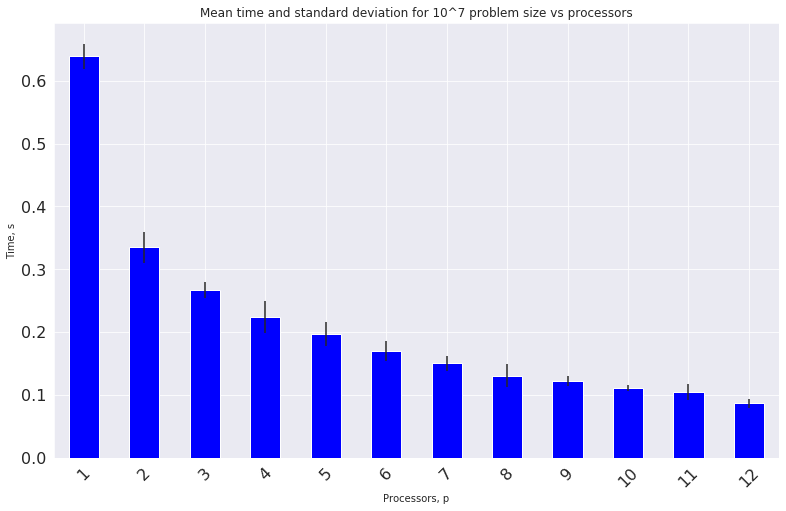

In [4]:
std = df.groupby(["m","p"], as_index= False)['s'].std()
std = std.iloc[:12,2]
std.index+=1
s = df.groupby(["m","p"], as_index= False)['s'].mean()
s = s.iloc[:12,2]
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for 10^7 problem size vs processors")
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

noticeably greater variance in calculation time for the smallest problem compared to the others

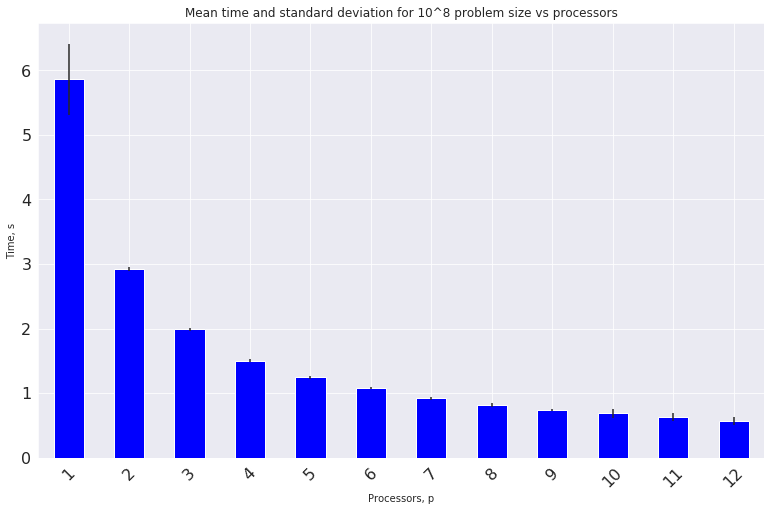

In [5]:
std = df.groupby(["m","p"], as_index= False)['s'].std()
std = std.iloc[12:24,2]
std.reset_index(drop=True, inplace=True)
std.index+=1
s = df.groupby(["m","p"], as_index= False)['s'].mean()
s = s.iloc[12:24,2]
s.reset_index(drop=True, inplace=True)
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for 10^8 problem size vs processors")
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

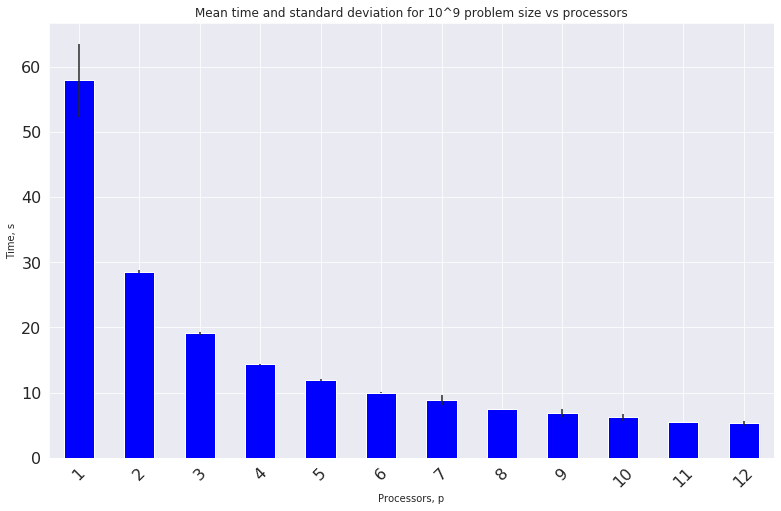

In [6]:
std = df.groupby(["m","p"], as_index= False)['s'].std()
std = std.iloc[24:36,2]
std.reset_index(drop=True, inplace=True)
std.index+=1
s = df.groupby(["m","p"], as_index= False)['s'].mean()
s = s.iloc[24:36,2]
s.reset_index(drop=True, inplace=True)
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for 10^9 problem size vs processors")
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

## Calculations

In [7]:
s = df.groupby(["m","p"], as_index= False).mean()
s['s_1p'] = 0
s.iloc[:12, 5]= s['s'][0]
s.iloc[12:24, 5]= s['s'][12]
s.iloc[24:36, 5]= s['s'][24]
s['n_1p'] = 0
s.iloc[:12, 6]= s['n'][0]
s.iloc[12:24, 6]= s['n'][12]
s.iloc[24:36, 6]= s['n'][24]
s['speedup'] = s['s_1p']/s['s']
s['speedup_sk'] = s['speedup']*(s['n']/s['n_1p'])
s['effectiveness'] = s['speedup']/s['p']
s['effectiveness_sk'] = s['speedup_sk']/s['p']
s['sequential_part'] = (1/s['speedup_sk'] - 1/s['p'])/(1-1/s['p'])
s.head(3)

,m,p,n,s,pi,s_1p,n_1p,speedup,speedup_sk,effectiveness,effectiveness_sk,sequential_part
0,10000000,1,10000000,0.639018,3.141678,0.639018,10000000,1.000000,1.000000,1.000000,1.000000,NaN
1,10000000,2,10000000,0.334852,3.141488,0.639018,10000000,1.908357,1.908357,0.954179,0.954179,0.048022
2,10000000,3,9999999,0.267095,3.140878,0.639018,10000000,2.392476,2.392476,0.797492,0.797492,0.126966


# Plots
points connected with lines were used for the charts
the points show accurate results, and the connecting lines allow easier observation of trends

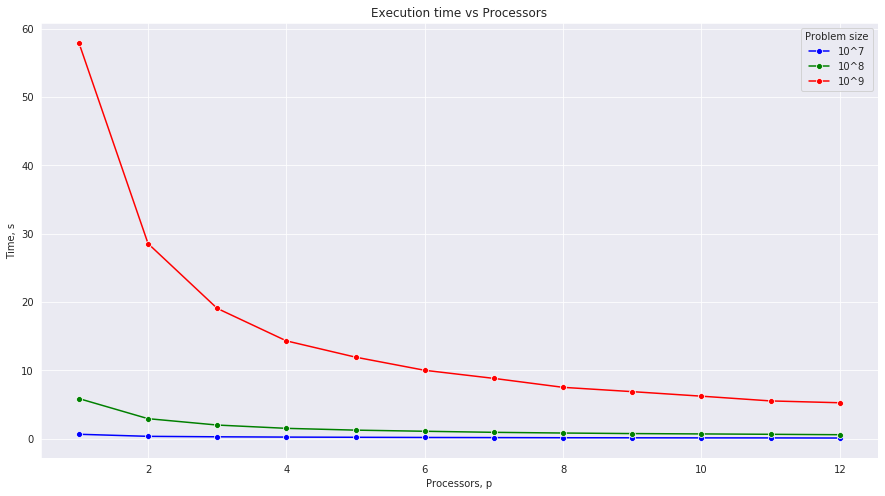

In [8]:
g = sns.lineplot(x="p", y="s", style="m", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.set_title("Execution time vs Processors")
g.set(xlabel='Processors, p', ylabel='Time, s')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.figure.set_size_inches(15, 8)

because the size of the task is constant and the number of processors increases, the calculation time decreases

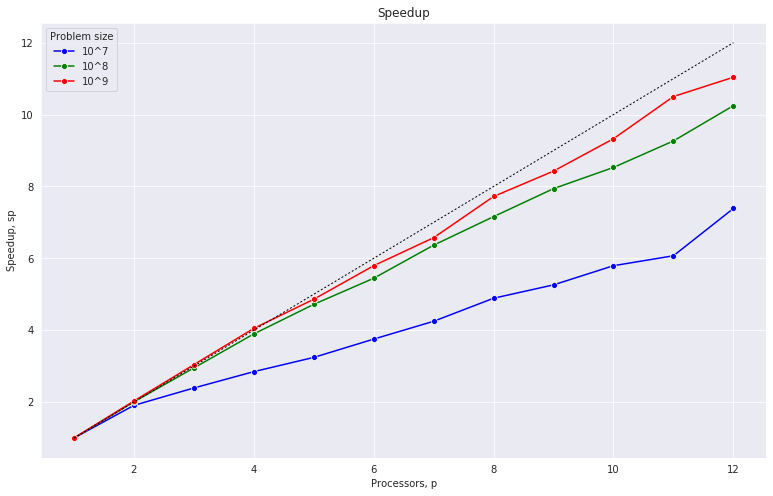

In [9]:
g = sns.lineplot(x="p", y="speedup", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.plot([1, 12], [1, 12], 'k-', lw=1,dashes=[2, 2])
g.set_title("Speedup")
g.set(xlabel='Processors, p', ylabel='Speedup, sp')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.figure.set_size_inches(13, 8)

perfect speedup for the largest problem size up to four processors due to the large amount of computation compared to communication

noticeably less speedup for the smallest size of the problem, the impact of a large amount of communication in relation to calculations

in the version with unscaled problem size, both scaled and unscaled acceleration are the same

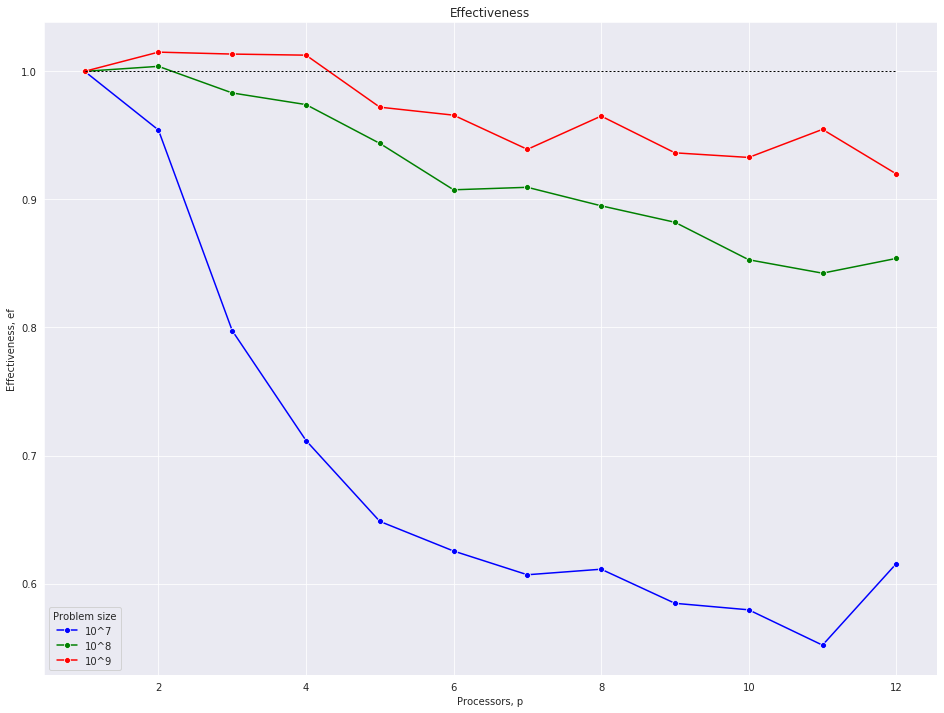

In [10]:
g = sns.lineplot(x="p", y="effectiveness", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.set_title("Effectiveness")
g.set(xlabel='Processors, p', ylabel='Effectiveness, ef')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.plot([1, 12], [1, 1], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)

much worse efficiency for the smallest problem size

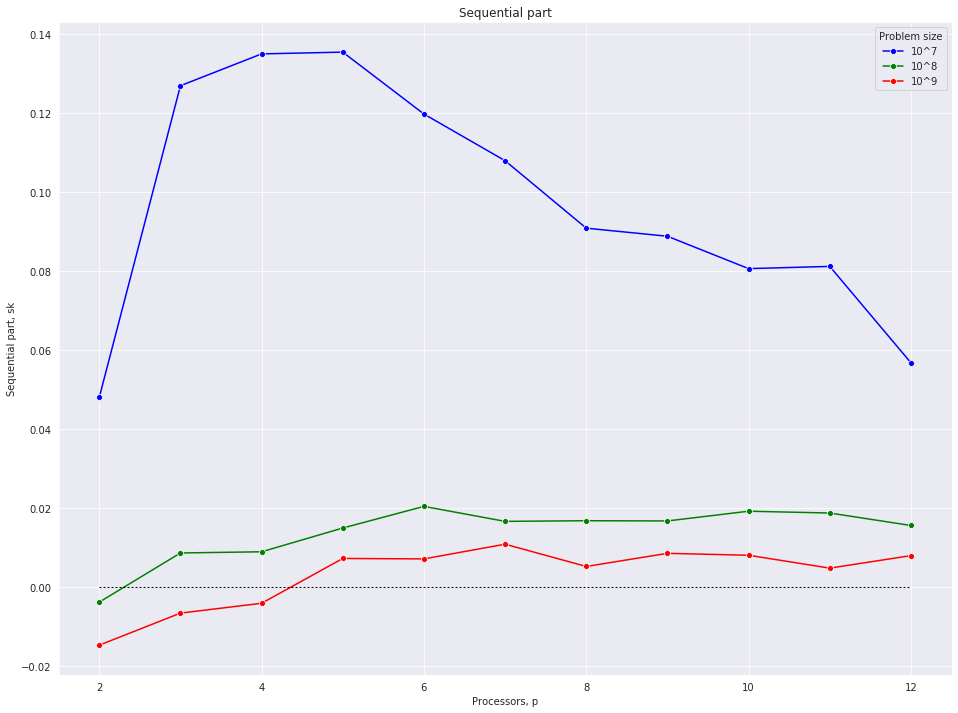

In [11]:
g = sns.lineplot(x="p", y="sequential_part", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.set_title("Sequential part")
g.set(xlabel='Processors, p', ylabel='Sequential part, sk')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.plot([2, 12], [0, 0], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)

the highest percentage of sequential part for the smallest problem caused by a lot of communication in relation to calculations

## 2. Scalable

In [12]:
df = pd.read_csv('./scalable.csv', header=0)

number of repetitions

In [13]:
df.groupby(["m","p"], as_index= False).count()['n'].head(1)

0    10
Name: n, dtype: int64

initial data check

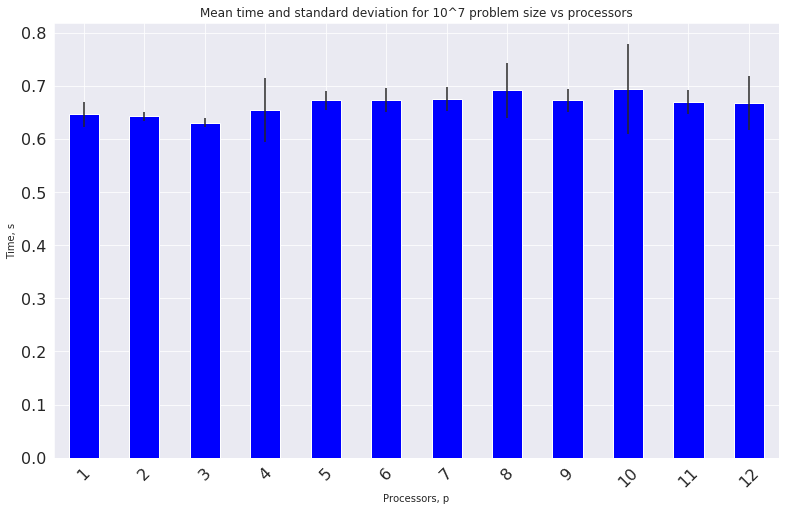

In [14]:
std = df.groupby(["m","p"], as_index= False)['s'].std()
std = std.iloc[:12,2]
std.index +=1
s = df.groupby(["m","p"], as_index= False)['s'].mean()
s = s.iloc[:12,2]
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for 10^7 problem size vs processors")
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

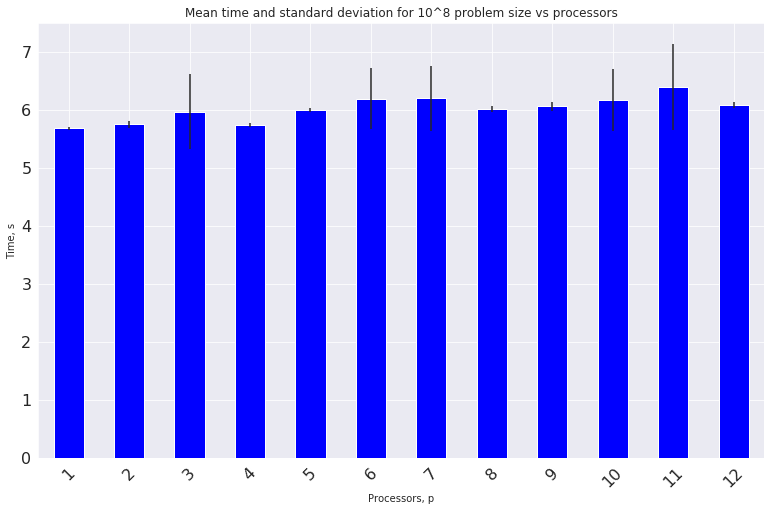

In [15]:
std = df.groupby(["m","p"], as_index= False)['s'].std()
std = std.iloc[12:24,2]
std.reset_index(drop=True, inplace=True)
std.index+=1
s = df.groupby(["m","p"], as_index= False)['s'].mean()
s = s.iloc[12:24,2]
s.reset_index(drop=True, inplace=True)
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for 10^8 problem size vs processors")
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

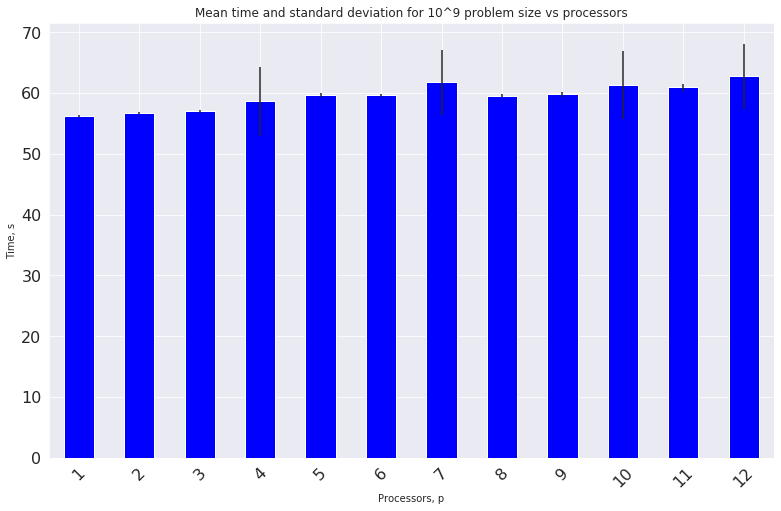

In [16]:
std = df.groupby(["m","p"], as_index= False)['s'].std()
std = std.iloc[24:36,2]
std.reset_index(drop=True, inplace=True)
std.index+=1
s = df.groupby(["m","p"], as_index= False)['s'].mean()
s = s.iloc[24:36,2]
s.reset_index(drop=True, inplace=True)
s.index+=1
p = s.plot(legend=False,kind="bar",rot=45,color="blue",fontsize=16,yerr=std);
p.set_title("Mean time and standard deviation for 10^9 problem size vs processors")
p.set(xlabel='Processors, p', ylabel='Time, s')
p.figure.set_size_inches(13, 8)

## Calculations

In [17]:
s = df.groupby(["m","p"], as_index= False).mean()
s['s_1p'] = 0
s.iloc[:12, 5]= s['s'][0]
s.iloc[12:24, 5]= s['s'][12]
s.iloc[24:36, 5]= s['s'][24]
s['n_1p'] = 0
s.iloc[:12, 6]= s['n'][0]
s.iloc[12:24, 6]= s['n'][12]
s.iloc[24:36, 6]= s['n'][24]
s['speedup'] = s['s_1p']/s['s']
s['speedup_sk'] = s['speedup']*(s['n']/s['n_1p'])
s['effectiveness'] = s['speedup']/s['p']
s['effectiveness_sk'] = s['speedup_sk']/s['p']
s['sequential_part'] = (1/s['speedup_sk'] - 1/s['p'])/(1-1/s['p'])
s.head(3)

,m,p,n,s,pi,s_1p,n_1p,speedup,speedup_sk,effectiveness,effectiveness_sk,sequential_part
0,10000000,1,10000000,0.646524,3.141561,0.646524,10000000,1.000000,1.000000,1.000000,1.000000,NaN
1,10000000,2,20000000,0.642632,3.141683,0.646524,10000000,1.006056,2.012111,0.503028,1.006056,-0.006019
2,10000000,3,30000000,0.631140,3.141372,0.646524,10000000,1.024373,3.073120,0.341458,1.024373,-0.011897


# Plots

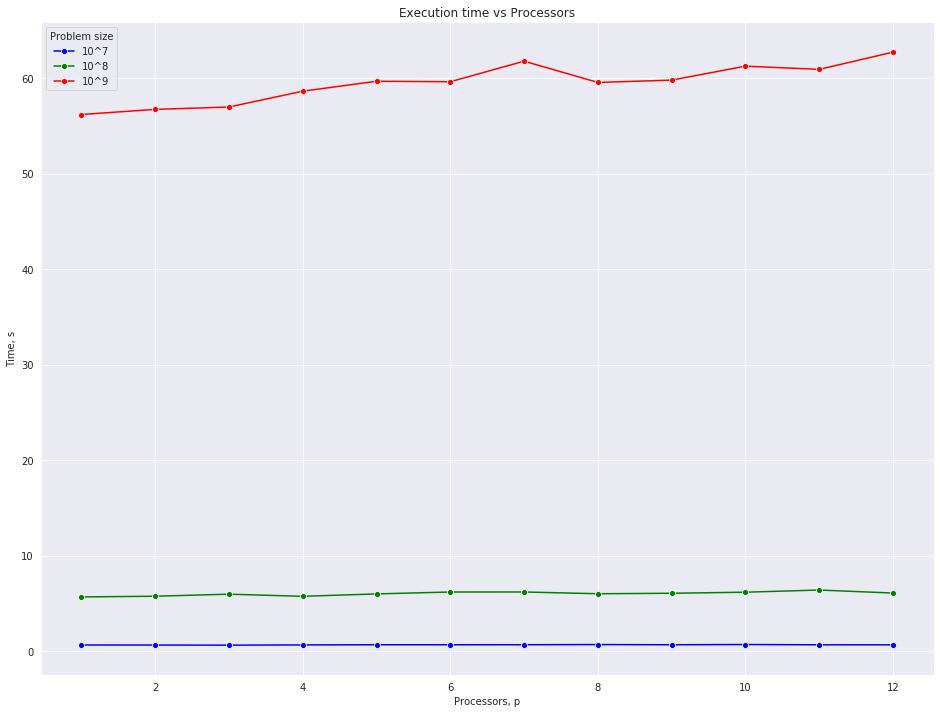

In [18]:
g = sns.lineplot(x="p", y="s", style="m", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.set_title("Execution time vs Processors")
g.set(xlabel='Processors, p', ylabel='Time, s')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.figure.set_size_inches(16, 12)

the size of the problem increases with the number of processors, the calculation time increases slightly

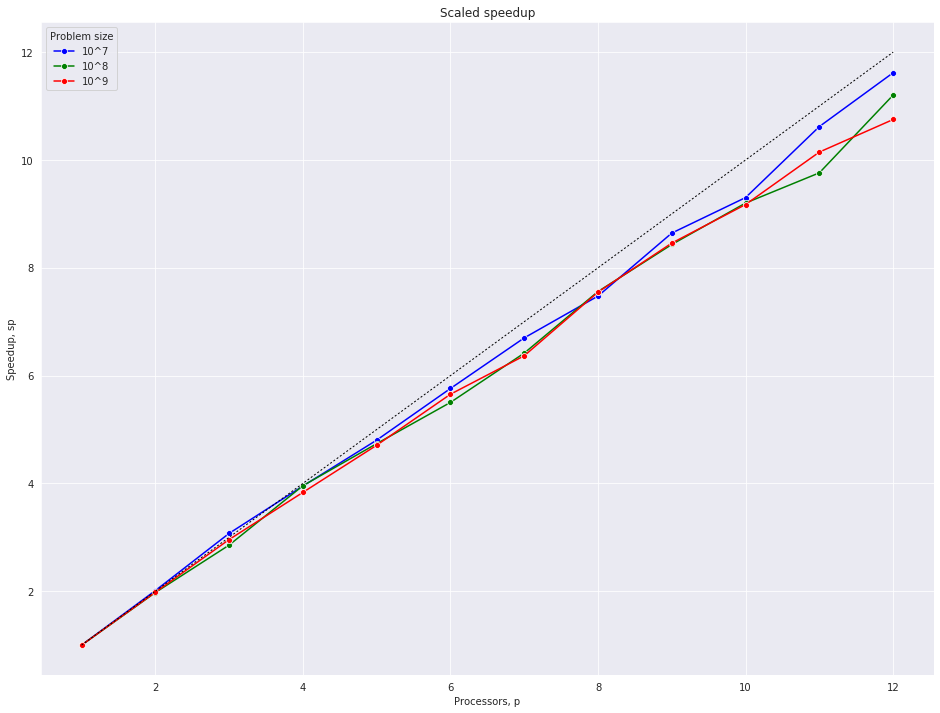

In [19]:
g = sns.lineplot(x="p", y="speedup_sk", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.plot([1, 12], [1, 12], 'k-', lw=1,dashes=[2, 2])
g.set_title("Scaled speedup")
g.set(xlabel='Processors, p', ylabel='Speedup, sp')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.figure.set_size_inches(16, 12)

scaled speedup was used, it allows comparing the calculation with unscaled and scaled problem size



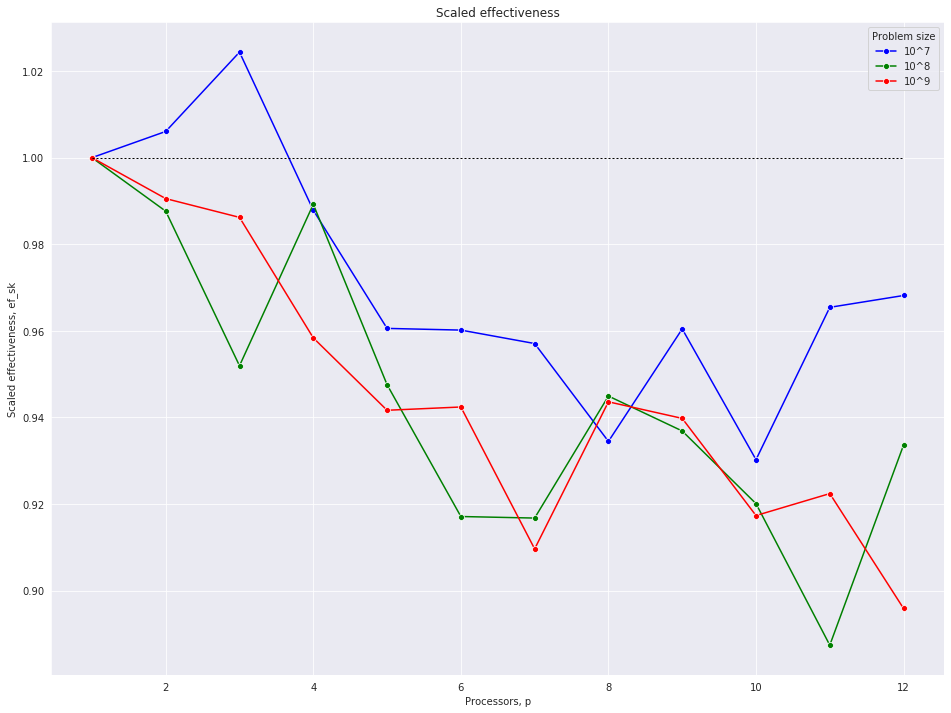

In [20]:
g = sns.lineplot(x="p", y="effectiveness_sk", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.set_title("Scaled effectiveness")
g.set(xlabel='Processors, p', ylabel='Scaled effectiveness, ef_sk')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.plot([1, 12], [1, 1], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)

disturbances in the calculated scaled effectiveness for the smallest problem caused by the fact that the time of sequential calculations was calculated

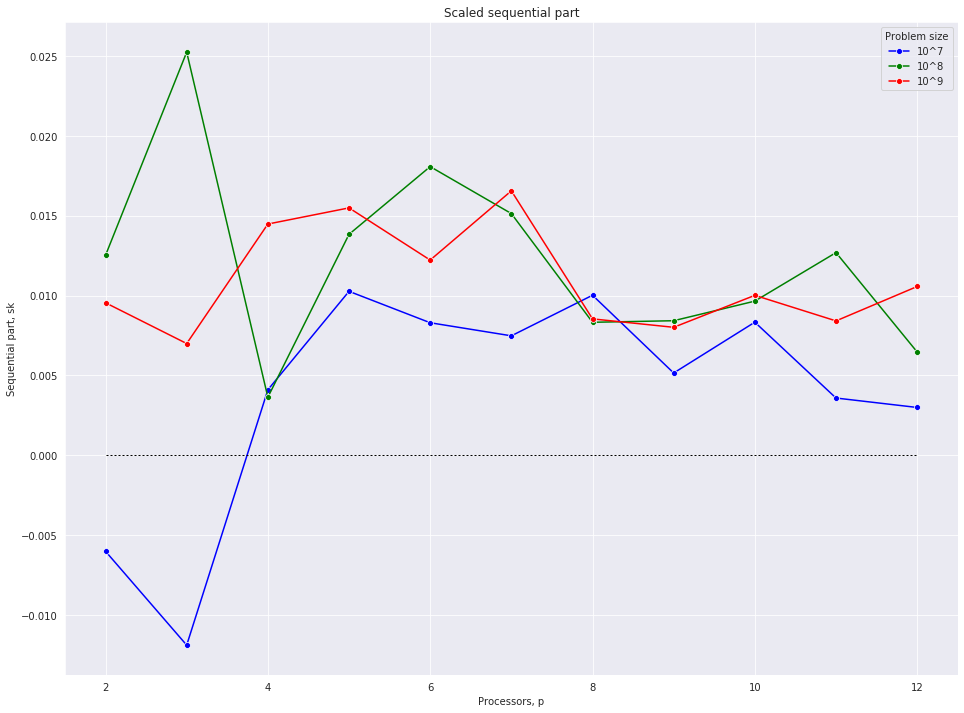

In [21]:
g = sns.lineplot(x="p", y="sequential_part", hue="m", palette=["blue", "green", "red"], marker="o", dashes=False, data=s)
g.set_title("Scaled sequential part")
g.set(xlabel='Processors, p', ylabel='Sequential part, sk')
plt.legend(title='Problem size', labels=['10^7', '10^8', '10^9'])
g.plot([2, 12], [0, 0], 'k-', lw=1,dashes=[2, 2])
g.figure.set_size_inches(16, 12)

again disturbances in the calculated sequential part for the smallest problem caused by the fact that the time of sequential calculations was calculated